# Introduction

## CRISP - DM Method
### [Business Understanding](#business_understanding)
### [Data Understanding](#data_understanding)
   #### [Step 1: Load data into a dataframe](#load_data_df)
   #### [Step 2: Display the dimensions of the file](#display_data)
   #### [Step 3: what type of variables are in the table](#variable_types)
### Data Prep
   #### [Adding new columns from datetime](#adding_yr_mnth)
   #### [Milestone 2](#milestone_2)
   #### [Test data preparation](#test_data)
### Modeling
### Evaluation
### Deployment

<a id='business_understanding'></a>
## 1. Business Understanding

- This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.
- Can you categorize news articles based on their headlines and short descriptions?
- Do news articles from different categories have different writing styles?
- A classifier trained on this dataset could be used on a free text to identify the type of language being used.

<a id='data_understanding'></a>
## 2. Data Understanding

In [4]:
# Grouping / Classification of documents based on Text Analysis - Part 1 
## Graphics Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#check versions of packages
print('Python version:')  
!python --version
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
# print('scikit-learn version:', sklearn.__version__)
# print('NLTK version:', nltk.__version__)

Python version:
Python 3.8.5
pandas version: 1.2.4
numpy version: 1.19.2


In [6]:
# Setting the parameters for the pandas dataframe

output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<a id='load_data_df'></a>
### Step 1: Load data into a dataframe

In [7]:
# This dataset contains the topics already marked and so I would like to use this 
# as training set for my model.
# I have a separate test data set for testing.

filename = "~/Documents/mygithub/bu_dsc/data/external/News_Category_Dataset_v2.json"
test_file = "~/Documents/mygithub/bu_dsc/data/external/global-issues.csv"

df_all = pd.read_json(filename, lines = True)
#display the first few rows of data
df_all.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


<a id='display_data'></a>
### Step 2: Display the dimensions of the file

In [8]:
## so you’ll have a good idea the amount of data you are working with.
print("The dimension of the table is: ", df_all.shape)
print("Checking to see if there are any missing data: ")
df_all.info()

The dimension of the table is:  (200853, 6)
Checking to see if there are any missing data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


<a id='variable_types'></a>
### Step 3: what type of variables are in the table 

In [9]:
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
# Does this present any more questions for you? 
# Does it lead you to a conclusion yet?

print("Describe Data") 
print(df_all.describe()) 
print("Summarized Data") 
print(df_all.describe(include='O'))

Describe Data
        category        headline authors                                                                                                                    link short_description                 date
count     200853          200853  200853                                                                                                                  200853            200853               200853
unique        41          199344   27993                                                                                                                  200812            178353                 2309
top     POLITICS  Sunday Roundup          https://www.huffingtonpost.comhttp://www.refinery29.com/spring-dresses?utm_source=huffpoststyle&utm_medium=syndication                    2012-12-21 00:00:00
freq       32739              90   36620                                                                                                                       2             19712        

<a id='adding_yr_mnth'></a>
### Breaking down the datetime column into year month for visualization  

In [10]:
# Breaking down the date column to Year and month separate columns for easy analysis
# the date column is having the data in the datetime format

df_all['year'] = df_all['date'].apply(lambda x: x.year)
df_all['month'] = df_all['date'].apply(lambda x: x.month)

df_all.head()

,category,headline,authors,link,short_description,date,year,month
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26,2018,5
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26,2018,5
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26,2018,5
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26,2018,5
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26,2018,5


In [11]:
# df_all.columns
for col in df_all.columns[[0,6,7]]:
    print(col,len(df_all[col].unique()),df_all[col].unique())

category 41 ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']
year 7 [2018 2017 2016 2015 2014 2013 2012]
month 12 [ 5  4  3  2  1 12 11 10  9  8  7  6]


In [12]:
# Display the dimensions of the dataframe post addition of the new columns
# We now see that it has 2 more columns added towards the end as year and month of type integer

print("The dimension of the table is: ", df_all.shape)
print("Checking to see if there are any missing data: ")
df_all.info()

The dimension of the table is:  (200853, 8)
Checking to see if there are any missing data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
 6   year               200853 non-null  int64         
 7   month              200853 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.3+ MB


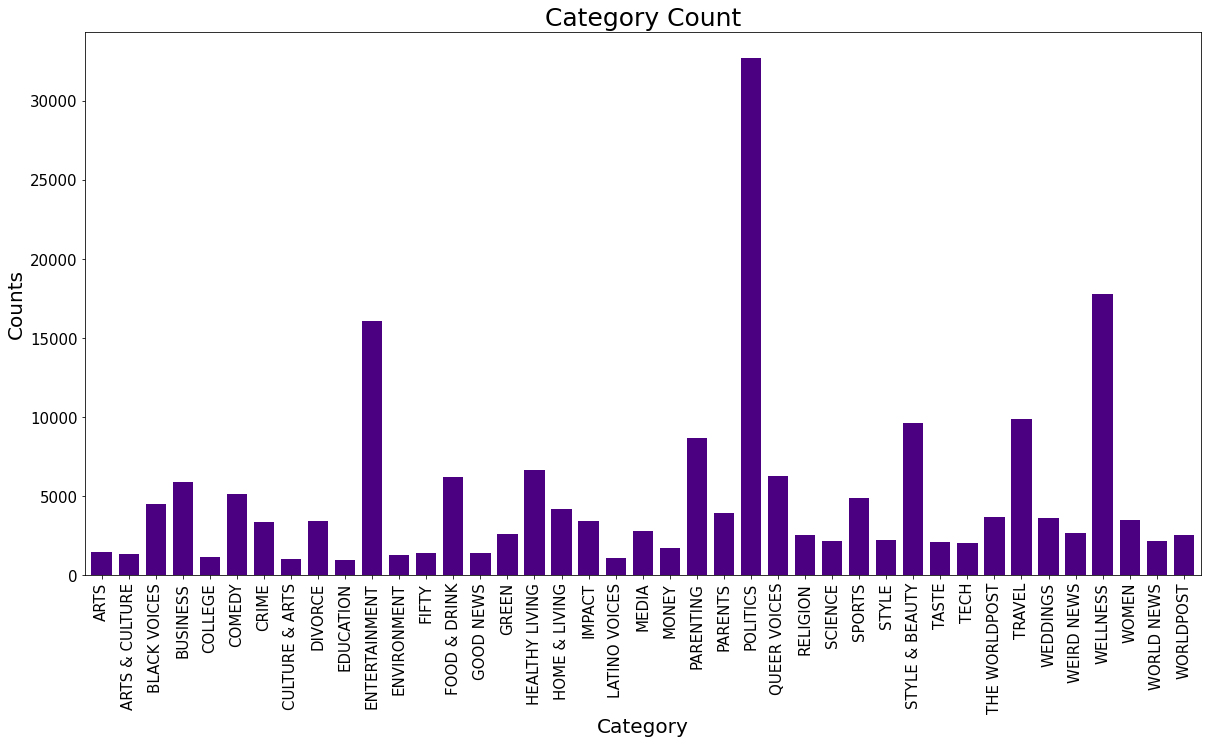

In [13]:
# Barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# Creating a separate dataframe for the categories in the training set
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.75 # the width of the bars

df_catg = df_all.groupby(['category'])['category'].count()

ax = df_catg.plot(kind='bar', figsize=(20,10), color="indigo",width = width)

plt.xticks(rotation=90)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

plt.show()


In [14]:
# Now subsetting the actual dataset
# Subsetting the dataset by category and year

subset_bycatgyear = df_all[['category','year']]
# This is an array of the years in the dataset
years = subset_bycatgyear['year'].unique()
years
# This shows an array of categories that is present in our dataset
# categories = subset_bycatgyear['category'].unique()
# categories


array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [15]:
# Creating a grouping subset to be used in my analysis later

year_grp = subset_bycatgyear.groupby(['year'])

In [16]:
# displaying the data
# print('showing all the categories for a particular year:')
# year_grp.get_group(2012)
print('showing all the categories for a particular year:')
year_grp['category'].value_counts().loc[2018]

showing all the categories for a particular year:


category
POLITICS          3067
ENTERTAINMENT     1720
WORLD NEWS         565
QUEER VOICES       451
COMEDY             443
BLACK VOICES       408
SPORTS             364
MEDIA              293
WOMEN              245
WEIRD NEWS         206
CRIME              174
BUSINESS            86
LATINO VOICES       83
IMPACT              77
TRAVEL              72
RELIGION            65
TECH                55
SCIENCE             40
PARENTS             36
STYLE               34
EDUCATION           32
GREEN               29
HEALTHY LIVING      15
ARTS & CULTURE      13
TASTE                9
COLLEGE              1
Name: category, dtype: int64

In [17]:
# Creating a dataframe out of the grouping set

df = pd.DataFrame(year_grp['category'].value_counts())
df.unstack(level=1)

category                                                                                                                                                                                                                                                                                                                                                                                                                  
category     ARTS ARTS & CULTURE BLACK VOICES BUSINESS COLLEGE  COMEDY  CRIME CULTURE & ARTS DIVORCE EDUCATION ENTERTAINMENT ENVIRONMENT  FIFTY FOOD & DRINK GOOD NEWS  GREEN HEALTHY LIVING HOME & LIVING  IMPACT LATINO VOICES  MEDIA   MONEY PARENTING PARENTS POLITICS QUEER VOICES RELIGION SCIENCE  SPORTS  STYLE STYLE & BEAUTY  TASTE   TECH THE WORLDPOST  TRAVEL WEDDINGS WEIRD NEWS WELLNESS  WOMEN WORLD NEWS WORLDPOST
year                                                                                                                                                                                                                                                                                                                                                                                                                               
2012          NaN            NaN        307.0    679.0     NaN   604.0  199.0          343.0  1256.0       NaN         562.0       482.0    NaN       1823.0       NaN    NaN            NaN        1620.0   332.0           NaN    NaN  1434.0    3127.0     NaN      NaN        474.0      NaN   347.0   271.0    NaN         5193.0    NaN  442.0           NaN  3229.0   1493.0        NaN   7138.0    NaN        NaN       NaN
2013          NaN            NaN        320.0    846.0     NaN   487.0  236.0          558.0  1772.0       NaN        1015.0       655.0    NaN       3420.0       NaN    NaN            NaN        2306.0   394.0           NaN    NaN    81.0    4200.0     NaN      NaN        681.0      NaN   360.0   269.0    NaN         3482.0    NaN  333.0           NaN  3384.0   1755.0        NaN   8029.0    NaN        NaN       NaN
2014        801.0            NaN        424.0   1448.0   380.0   690.0  548.0          129.0   398.0     323.0        2122.0       186.0  667.0        983.0     315.0  806.0         2008.0         269.0  1103.0         121.0  486.0   192.0    1350.0   969.0   3182.0        971.0    789.0   447.0   909.0  531.0          974.0  521.0   76.0           NaN  1861.0    403.0      313.0   2660.0  780.0        NaN    1204.0
2015        618.0          207.0        958.0   1536.0   524.0   811.0  997.0            NaN     NaN     320.0        3923.0         NaN  577.0          NaN     461.0  738.0         1994.0           NaN   801.0         269.0  865.0     NaN       NaN   947.0   5887.0       1138.0    948.0   506.0  1337.0  678.0            NaN  625.0  471.0         512.0   662.0      NaN      801.0      NaN  764.0        NaN    1131.0
2016         87.0          596.0       1150.0    936.0   182.0   989.0  802.0            NaN     NaN      98.0        3526.0         NaN  155.0          NaN     597.0  505.0         1241.0           NaN   435.0         354.0  538.0     NaN       NaN   774.0   9990.0       1165.0    424.0   383.0  1324.0  481.0            NaN  409.0  578.0        2071.0   433.0      NaN      870.0      NaN  779.0        NaN     226.0
2017          3.0          523.0        961.0    406.0    57.0  1151.0  449.0            NaN     NaN     231.0        3190.0         NaN    2.0          NaN      25.0  544.0         1436.0           NaN   317.0         302.0  633.0     NaN       NaN  1229.0  10613.0       1434.0    330.0    95.0   410.0  530.0            NaN  532.0  127.0        1081.0   246.0      NaN      480.0      NaN  922.0     1612.0      18.0
2018          NaN           13.0        408.0     86.0     1.0   443.0  174.0            NaN     NaN      32.0        1720.0         NaN    NaN          NaN       NaN   29.0           15.0           NaN    77.0          83.0  293

In [18]:
# getting the top 3 categories for each year



Text(0, 0.5, 'Counts')

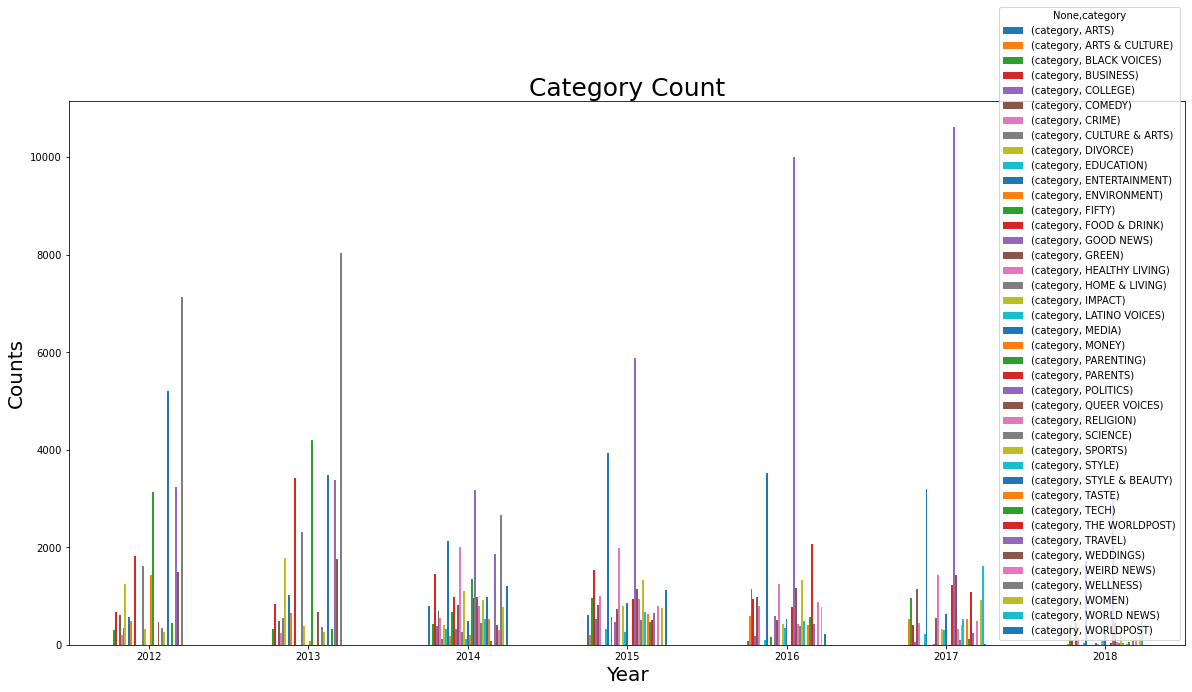

In [19]:
# Grouped barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.50 # the width of the bars
plt.rcParams['figure.figsize'] = (20, 10)

# Get the data
# df = subset_bycatgyear.groupby(['year','category'])['category'].count()
df1 = df.unstack(level=1)

ax = df1.plot(kind='bar', width = width)

# Define the bar


# make the bar plot
plt.xticks(rotation=0)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
# ax.tick_params(axis='both', labelsize=15)

# plt.show()

<a id='milestone_2'></a>
## Milestone 2

In [20]:
#display the first few rows of data
df_all.head()


,category,headline,authors,link,short_description,date,year,month
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26,2018,5
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26,2018,5
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26,2018,5
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26,2018,5
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26,2018,5


In [21]:
# Display the dimensions of the dataframe post addition of the new columns
# We now see that it has 2 more columns added towards the end as year and month of type integer

print("The dimension of the table is: ", df_all.shape)
print("Checking to see if there are any missing data: ")
df_all.info()

The dimension of the table is:  (200853, 8)
Checking to see if there are any missing data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
 6   year               200853 non-null  int64         
 7   month              200853 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.3+ MB


### Description of the data set
The training data set contains 200,853 rows and they represent the articles from huffington post on different topics.

It has 8 columns with 7 features as the "category" column represents the target vector. We would be using this as a supervised learning algorithm.

The model would be using the headline and the short description feature to categorize the headlines. 

The year and month features were added later and is a modified feature. So these 2 features could be dropped from the data set for model purpose. These 2 features would not add any additional information. So as part of the Feature selection process I am dropping them.

The link feature shows the internet link of the headline. It shows a weblink to the news item and hence would not add any additional information for the categorization.

As this project relates to text analysis so I am for the time being not considering any other features from the dataset other than the text values.


In [22]:
# In the next step I am creating a new training dataframe df_train and the target vector as y
# 
df_train = df_all[['headline','short_description']]
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           200853 non-null  object
 1   short_description  200853 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [23]:
# The target vector 
y = df_all['category']
print ('Length of the target vector: ' , len(y))
print ('Size of the vector: ',y.size)

Length of the target vector:  200853
Size of the vector:  200853


In [24]:
## In the next section I am working on cleaning the dataset and word tokenization.

In [25]:
#Convert text to lowercase and romove punctuation
#define a function to clean the text

# import the required libraries here

#import regular expressions library
import re

def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text
    Output: text
    """
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z]'," ", text) #removes any non-alphabetic characters
    return text

In [42]:
#import word tokenizer from NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_and_remove_stop_words(txt):
    """
    takes in a sentence, tokenizes the words into a list,
    and then removes stop words from the tokenized list
    """
    stop_words = stopwords.words('english')
    txt_token = word_tokenize(txt)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    return txt_no_stopwords

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
#Apply NLTK's PorterStemmer
#define a function to stem the words
from nltk.stem.porter import PorterStemmer

def stem_text(word_list):

    porter = PorterStemmer()
    return [porter.stem(word) for word in word_list]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Testing the functions
input_txt = "There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV"
output_txt = clean_text(input_txt)
output_txt

'there were   mass shootings in texas last week but only   on tv'

In [60]:
#create a new data frame for the column for each pre-processing step
#take a random sample of the dataframe to cut down on processing time
#number of comments to keep
num_comments = 5000
df_sample = df_train.sample(n = num_comments).reset_index(drop = True )
df_sample.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,headline,short_description
0,"Greenhouse Gas Emissions Rise With GDP But Slower To Fall During Recession, Study Finds","Emissions of carbon dioxide, the main greenhouse gas, rose by an average of 0.73 percent for every 1 percent growth in gross"
1,"Catholic Church: It's Not Me, It's You","There is a certain voicelessness that I associate with my experience in Catholicism--sure, I can talk about gay rights, premarital sex or saving the environment, but I am often met with a dismissive response or the assumption that I'm going through a progressive phase."
2,You're Probably Investing In Gun Companies And Don't Even Know It,
3,"Fan Picks Nose Behind TNT Broadcast Crew, Winks At Camera (VIDEO)","By Joe Lucia, Awful Announcing During Thursday's Trail Blazers-Knicks game on TNT, this fan sitting behind TNT's broadcast"
4,American Surgeons Poorly Prepared For Humanitarian Operations,"Ever-more specialized American surgeons don't learn the skills needed in areas stricken by war, earthquakes or other disasters."


In [77]:
## Applying the cleaning function for the headline part

#apply text cleaning function
df_sample['clean'] = df_sample['short_description'].apply(clean_text)
#apply tokenizing
df_sample['tokenized'] = df_sample['clean'].apply(tokenize_and_remove_stop_words)
#apply PorterStemmer function
df_sample['txt_stemmed'] = df_sample['tokenized'].apply(stem_text)
#put the text back together (untokenize)
df_sample['final'] = df_sample['txt_stemmed'].apply(lambda text: ' '.join(text))
#view the pre-processed text
print('Show the dimension of the new dataframe: ', df_sample.shape)
df_sample.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Show the dimension of the new dataframe:  (5000, 6)


,headline,short_description,clean,tokenized,final,txt_stemmed
0,"Greenhouse Gas Emissions Rise With GDP But Slower To Fall During Recession, Study Finds","Emissions of carbon dioxide, the main greenhouse gas, rose by an average of 0.73 percent for every 1 percent growth in gross",emissions of carbon dioxide the main greenhouse gas rose by an average of percent for every percent growth in gross,"[emissions, carbon, dioxide, main, greenhouse, gas, rose, average, percent, every, percent, growth, gross]",emiss carbon dioxid main greenhous ga rose averag percent everi percent growth gross,"[emiss, carbon, dioxid, main, greenhous, ga, rose, averag, percent, everi, percent, growth, gross]"
1,"Catholic Church: It's Not Me, It's You","There is a certain voicelessness that I associate with my experience in Catholicism--sure, I can talk about gay rights, premarital sex or saving the environment, but I am often met with a dismissive response or the assumption that I'm going through a progressive phase.",there is a certain voicelessness that i associate with my experience in catholicism sure i can talk about gay rights premarital sex or saving the environment but i am often met with a dismissive response or the assumption that i m going through a progressive phase,"[certain, voicelessness, associate, experience, catholicism, sure, talk, gay, rights, premarital, sex, saving, environment, often, met, dismissive, response, assumption, going, progressive, phase]",certain voiceless associ experi catholic sure talk gay right premarit sex save environ often met dismiss respons assumpt go progress phase,"[certain, voiceless, associ, experi, catholic, sure, talk, gay, right, premarit, sex, save, environ, often, met, dismiss, respons, assumpt, go, progress, phase]"
2,You're Probably Investing In Gun Companies And Don't Even Know It,,,[],,[]
3,"Fan Picks Nose Behind TNT Broadcast Crew, Winks At Camera (VIDEO)","By Joe Lucia, Awful Announcing During Thursday's Trail Blazers-Knicks game on TNT, this fan sitting behind TNT's broadcast",by joe lucia awful announcing during thursday s trail blazers knicks game on tnt this fan sitting behind tnt s broadcast,"[joe, lucia, awful, announcing, thursday, trail, blazers, knicks, game, tnt, fan, sitting, behind, tnt, broadcast]",joe lucia aw announc thursday trail blazer knick game tnt fan sit behind tnt broadcast,"[joe, lucia, aw, announc, thursday, trail, blazer, knick, game, tnt, fan, sit, behind, tnt, broadcast]"
4,American Surgeons Poorly Prepared For Humanitarian Operations,"Ever-more specialized American surgeons don't learn the skills needed in areas stricken by war, earthquakes or other disasters.",ever more specialized american surgeons don t learn the skills needed in areas stricken by war earthquakes or other disasters,"[ever, specialized, american, surgeons, learn, skills, needed, areas, stricken, war, earthquakes, disasters]",ever special american surgeon learn skill need area stricken war earthquak disast,"[ever, special, american, surgeon, learn, skill, need, area, stricken, war, earthquak, disast]"


In [78]:
# Using the word count vectorizer as feature engineering work.
# As part of this exercise I am using only the headline text
#create the bag of words feature matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
bag_of_words = count.fit_transform(df_sample['final'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
#check the shape of the output
bag_of_words.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 9323)

In [32]:
# Note that there for this sample data there are 50000 rows as expected, and the 30810 columns correspond to the unique words in the headlines.

In [80]:
#define a function to get the tf-idf vectorization
#import tf-idf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_sample['final'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
#check the shape of the output
tfidf_matrix.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5000, 9323)

In [35]:
# Note that the TFIDF matrix has the same shape as the word count vector. 
# This makes sense as the number of columns in both matrices corresponds to the number of unique words. 
# Whereas the word count vectorizer is only counting the number of times the word appears the TFIDF vectorization weighs how important each word is in each comment.

Milestone 3

Method for defining document similarity: There are 2 primary approaches to unsupervised learning - partitive clustering and hierarchical clustering. These methods are implemented in NLTK and Scikit-Learn. The resulting clusters will be evaluated using Gensim for topic modeling to describe and summarize our clusters.

## Topic Model building
I am using the LDA (Latent Drichilet Allocation) model.This is one of the two alternative means of unsupervised learning. In LDA topics are represented as the probability that each of a given set of terms will occur.Documents can in turn be represented in terms of a mixture of these topics.

In [82]:
# importing the necessary libraries
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim_models


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# Creating a dictionary of words from the tokenized list of words
dictionary = corpora.Dictionary(df_sample['txt_stemmed'])
print(dictionary.num_nnz)

51845
/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
# Create document term matrix
# As we have sampled 5000 rows so this matrix has 5000 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_sample['txt_stemmed']]
print(len(doc_term_matrix))

5000
/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Instantiate LDA model
# lda = gensim.models.ldamodel.LdaModel
# Instatiate LDA Multicore
lda = gensim.models.ldamulticore.LdaMulticore

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
# Fit LDA model on the dataset
# from my understanding of the training dataset I know there are 41 categories
num_topics = 41
%time ldamodel = lda(doc_term_matrix, num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
CPU times: user 49.4 s, sys: 2.42 s, total: 51.8 s
Wall time: 51.5 s


In [90]:
# Print the topics identified by LDA model
ldamodel.print_topics(num_topics=num_topics)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.007*"look" + 0.006*"someth" + 0.006*"bring" + 0.006*"beach" + 0.005*"new" + 0.005*"cancer" + 0.005*"year" + 0.005*"day" + 0.005*"think" + 0.004*"come"'),
 (1,
  '0.011*"day" + 0.010*"time" + 0.008*"get" + 0.007*"let" + 0.006*"life" + 0.006*"travel" + 0.006*"could" + 0.005*"new" + 0.005*"may" + 0.005*"trust"'),
 (2,
  '0.011*"start" + 0.011*"help" + 0.007*"peopl" + 0.006*"famili" + 0.006*"time" + 0.006*"work" + 0.006*"short" + 0.006*"day" + 0.006*"rise" + 0.006*"would"'),
 (3,
  '0.012*"time" + 0.010*"one" + 0.008*"make" + 0.007*"clinton" + 0.007*"hillari" + 0.006*"get" + 0.006*"ask" + 0.006*"take" + 0.006*"fear" + 0.006*"first"'),
 (4,
  '0.013*"health" + 0.010*"show" + 0.008*"everyth" + 0.008*"differ" + 0.008*"get" + 0.007*"new" + 0.006*"studi" + 0.005*"back" + 0.005*"light" + 0.005*"care"'),
 (5,
  '0.010*"get" + 0.009*"said" + 0.007*"noth" + 0.006*"new" + 0.006*"readi" + 0.006*"better" + 0.005*"know" + 0.005*"long" + 0.005*"day" + 0.005*"make"'),
 (6,
  '0.009*"make" + 0.0

In [91]:
# Visualize the LDA model results
# The visualization shows that there is no overlap of the topics
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix,dictionary,sort_topics=False,mds='mmds')
pyLDAvis.display(lda_display)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### I am loading the below dataset as the test dataset
### Although this dataset as I downloaded from kaggle site did have some classification data but I will tend to avoid it and use it to predict the cluster


In [ ]:
df_test = pd.read_csv(test_file)
df_test.info()

In [ ]:
df_test.head()